In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
mm=Base.classes.measurement
sta=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
first_row = session.query(mm).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ea420351f0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(mm.date).order_by(mm.date.desc()).first()
print(recent_date)

('2017-08-23',)


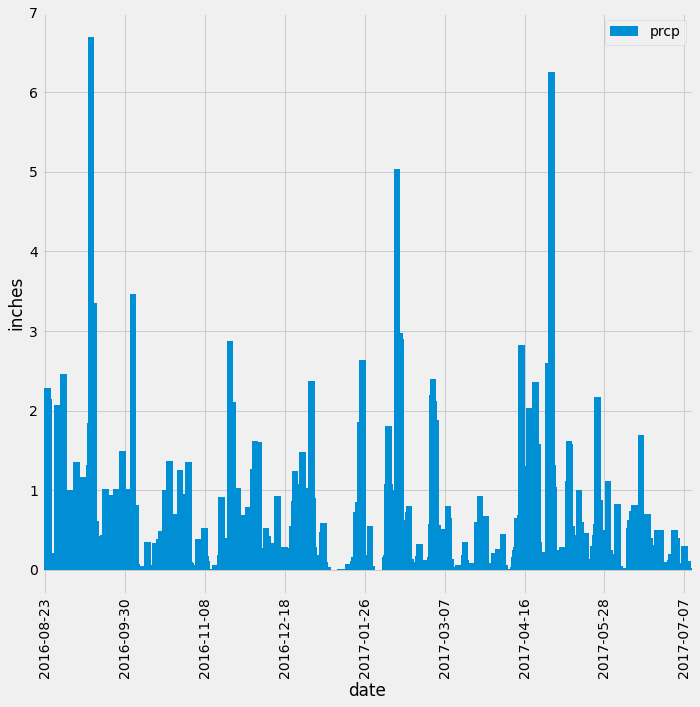

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_date=dt.date(2017,8,23)-dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
twm=session.query(mm.date,mm.prcp).filter(mm.date>=prev_date).order_by(mm.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(twm,columns=['date','prcp'])
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
date_list=df['date'].tolist()
df.plot(kind='bar',figsize=(10,10),width=20,xlabel="date",ylabel='inches')
plt.xticks(range(0,len(date_list)), date_list)
plt.tight_layout()
plt.locator_params(axis='x', nbins=9)
plt.xlim(-10,2010)
plt.ylim(-0.3,7)
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
total_station=session.query(mm.station).group_by(mm.station).count()
total_station

9

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station_count=session.query(mm.station,func.count(mm.id)).group_by(mm.station).order_by(func.count(mm.id).desc())
for i in active_station_count:
    print(i)

    

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp=session.query(func.min(mm.tobs)).filter(mm.station=='USC00519281').one()
high_temp=session.query(func.max(mm.tobs)).filter(mm.station=='USC00519281').one()
avg_temp=session.query(func.avg(mm.tobs)).filter(mm.station=='USC00519281').one()


(71.66378066378067)

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_active_station=session.query(mm.date,mm.tobs)).filter(mm.station=='USC00519281').all()
df=pd.DataFrame(year_active_station,columns=['date','temperature'])
# Sort the dataframe by date
date_list=df['date'].tolist()
# df.plot(kind='bar',figsize=(10,10),width=20,xlabel="date",ylabel='inches')
# plt.xticks(range(0,len(date_list)), date_list)
# plt.tight_layout()
# plt.locator_params(axis='x', nbins=9)
# plt.xlim(-10,2010)
# plt.ylim(-0.3,7)
# plt.show()

# Close session

In [16]:
# Close Session
session.close()